
Number of cluster = 2

Silhouette score = 0.5290397175472954

Number of cluster = 3

Silhouette score = 0.5572466391184154

Number of cluster = 4

Silhouette score = 0.5832757517829593

Number of cluster = 5

Silhouette score = 0.6582796909760834

Number of cluster = 6

Silhouette score = 0.5791018915912662

Number of cluster = 7

Silhouette score = 0.5250820713516716

Number of cluster = 8

Silhouette score = 0.4572563184434927

Number of cluster = 9

Silhouette score = 0.3959754252664275


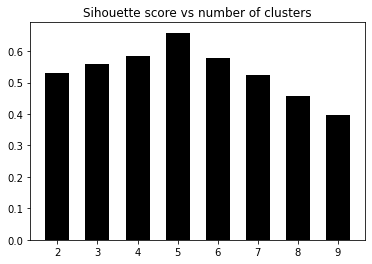

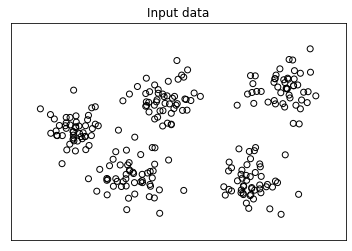

In [10]:
'''
cluster是一种无监督学习，因此没有原始值作为参考以衡量聚类效果
度量聚类算法的一个方法是观察集群被分离的离散程度 -> 轮廓系数 score = (x-y)/max(x,y)
x: point与其他point的平均距离； y: point与最近的另一个集群的所有点的平均距离
'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans

X = []
with open('data_perf.txt','r') as f:
    for line in f.readlines():
        data = [float(x) for x in line.split(',')]
        X.append(data)
X = np.array(X)
#print(X[:4])
scores = []
range_values = np.arange(2, 10)
#print(range_values)

for i in range_values:
    # 训练模型
    kmeans = KMeans(init='k-means++', n_clusters=i, n_init=10)
    kmeans.fit(X)
    score = metrics.silhouette_score(X, kmeans.labels_, metric='euclidean', sample_size=len(X))
    print('\nNumber of cluster =',i)
    print('\nSilhouette score =',score)
    scores.append(score)
    
# 得分条形图
plt.figure()
plt.bar(range_values, scores, width=0.6, color='k', align='center')
plt.title('Sihouette score vs number of clusters')

# 数据点散点图
plt.figure()
plt.scatter(X[:,0],X[:,1],color='k',marker='o',facecolor='none')
x_min, x_max = min(X[:,0])-1, max(X[:,0])+1
y_min, y_max = min(X[:,1])-1, max(X[:,1])+1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Epsilon: 0.3 -> silhouette score: 0.1287
Epsilon: 0.39999999999999997 -> silhouette score: 0.3594
Epsilon: 0.5 -> silhouette score: 0.5134
Epsilon: 0.6 -> silhouette score: 0.6165
Epsilon: 0.7 -> silhouette score: 0.6322
Epsilon: 0.7999999999999999 -> silhouette score: 0.6366
Epsilon: 0.8999999999999999 -> silhouette score: 0.5142
Epsilon: 1.0 -> silhouette score: 0.5629
Epsilon: 1.0999999999999999 -> silhouette score: 0.5629
Epsilon: 1.2 -> silhouette score: 0.5629


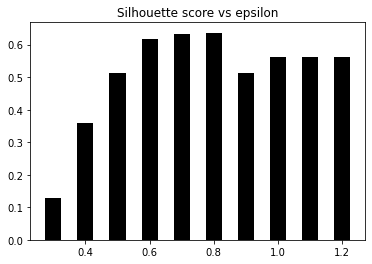


Best epsilon = 0.7999999999999999

Best Model  DBSCAN(eps=0.7999999999999999)

Best labels  {0, 1, 2, 3, 4, -1}


In [14]:
# k-means 算法，需要将集群数量作为一个输入参数，实际中不太现实
# DBSCAN（带噪声的基于密度的聚类方法）可以迅速查出集群数量，参数epsilon限定距离值
from itertools import cycle
from sklearn.cluster import DBSCAN

# 初始化一些变量，找出最佳集群数量参数
eps_grid = np.linspace(0.3, 1.2, num=10)
eps_best = eps_grid[0]

silhouette_scores = []
silhouette_score_max = -1

model_best = None
labels_best = None

# 搜索参数空间
for eps in eps_grid:
    model = DBSCAN(eps=eps, min_samples=5).fit(X)
    labels = model.labels_
    silhouette_score = round(metrics.silhouette_score(X, labels), 4)
    silhouette_scores.append(silhouette_score)
    print('Epsilon:',eps,"-> silhouette score:",silhouette_score)
    
    if silhouette_score > silhouette_score_max:
        silhouette_score_max = silhouette_score
        eps_best = eps
        model_best = model
        labels_best = labels

# plot bar
plt.figure()
plt.bar(eps_grid, silhouette_scores, width=0.05, color='k', align='center')
plt.title("Silhouette score vs epsilon")
plt.show()

# 最优参数对应的模型与标记
print("\nBest epsilon =",eps_best)
model = model_best
labels = labels_best
print("\nBest Model ",model)
print("\nBest labels ",set(labels))


Estimated number of clusters = 5


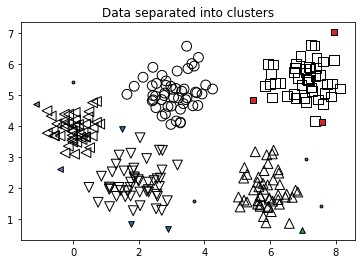

In [18]:
# 有些数据点没有可匹配集群，需要做出识别
offset = 0
if -1 in labels:
    offset = 1

# 实际集群数量
num_clusters = len(set(labels)) - offset
print("\nEstimated number of clusters =",num_clusters)

# 从训练模型中提取核心样本的datapoint index
mask_core = np.zeros(labels.shape, dtype=np.bool)
mask_core[model.core_sample_indices_] = True

# plot
plt.figure()
labels_uniq = set(labels)
markers = cycle('vo^s<>')
for cur_label, marker in zip(labels_uniq, markers):
    # .标记未分配数据点
    if cur_label == -1:
        marker = '.'
    
    # 为当前标记添加符号
    cur_mask = (labels == cur_label)
    cur_data = X[cur_mask & mask_core]
    plt.scatter(cur_data[:,0],cur_data[:,1],marker=marker, edgecolor='black', s=96, facecolor='none')
    cur_data = X[cur_mask & ~mask_core]
    plt.scatter(cur_data[:,0],cur_data[:,1],marker=marker, edgecolor='black', s=32)

plt.title("Data separated into clusters")
plt.show()